## Importing the neccesary libraries and loading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_train=pd.read_csv("train.csv")
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_test=pd.read_csv("test.csv")
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data_train.shape

(891, 12)

In [5]:
data_test.shape

(418, 11)

In [6]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Dealing with missing Values

<AxesSubplot:xlabel='Embarked', ylabel='count'>

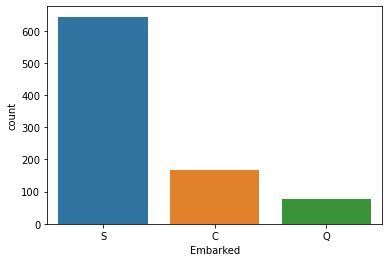

In [8]:
sns.countplot("Embarked", data=data_train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

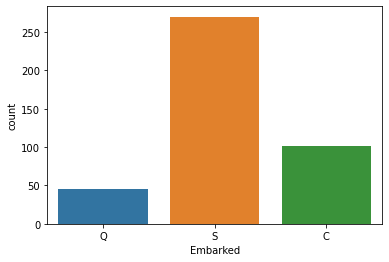

In [9]:
sns.countplot("Embarked", data=data_test)

In [10]:
#Filling the EMbarked column with the most occurring value
data_train["Embarked"].fillna(data_train["Embarked"].mode()[0], inplace=True)

In [11]:
data_test["Embarked"].fillna(data_test["Embarked"].mode()[0], inplace=True)

In [12]:
data_train.drop(columns="Cabin",axis=0, inplace=True)

In [13]:
data_test.drop(columns="Cabin",axis=1, inplace=True)

The cabin column was dropped becuse it has the highest value of missing values and its not really needed.

checking how the missing values are distributed in the dataset

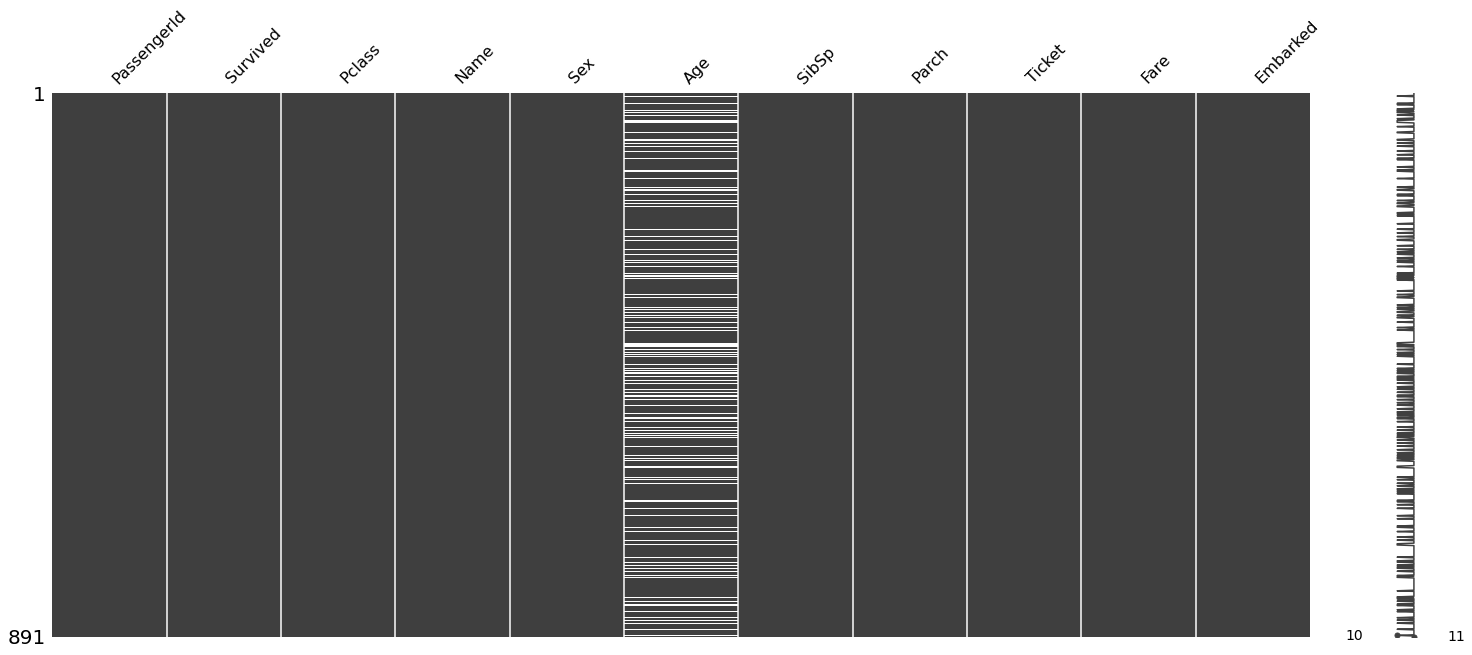

In [14]:
import missingno as msno
msno.matrix(data_train)
plt.show()

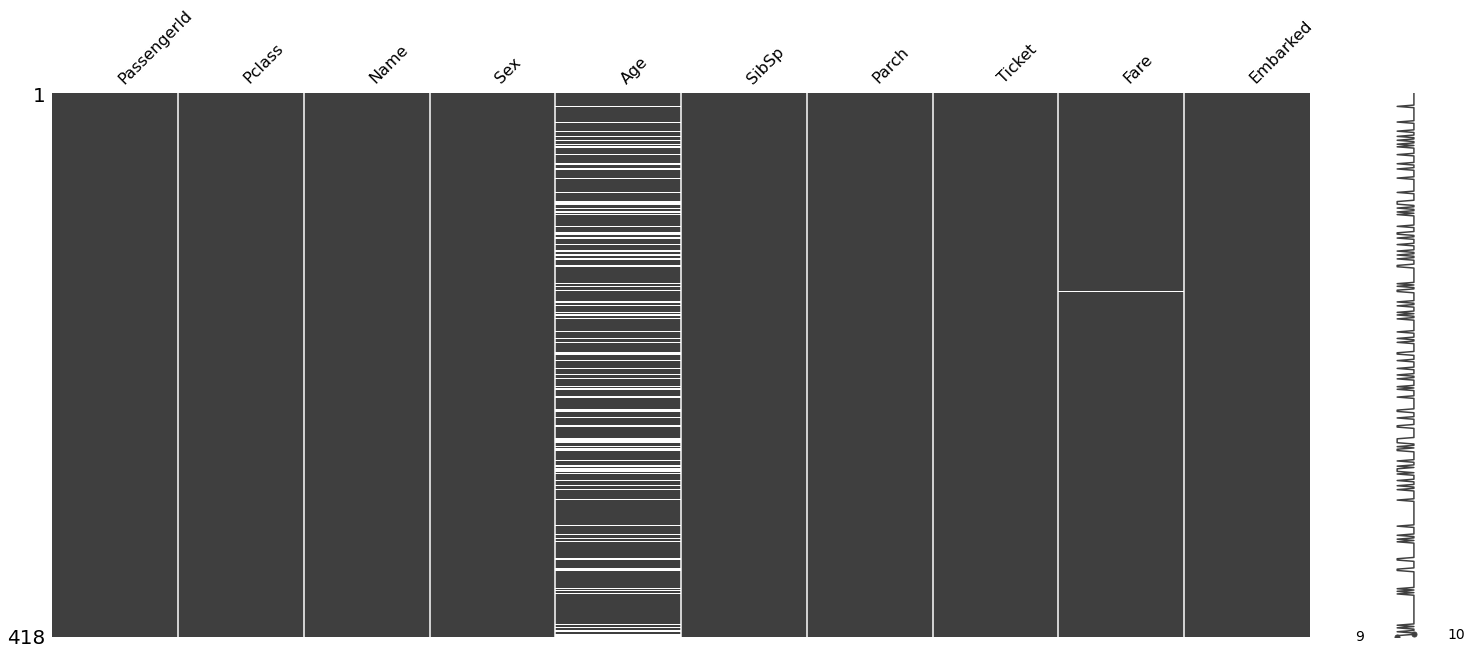

In [15]:
import missingno as msno
msno.matrix(data_test)
plt.show()

In [16]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<AxesSubplot:xlabel='Age', ylabel='Density'>

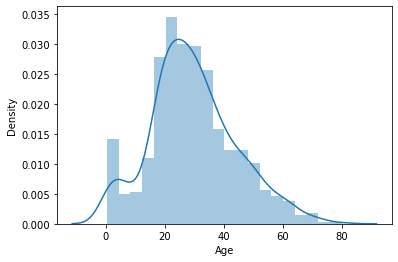

In [18]:
#Plotting to see how distributed the Age column is
sns.distplot(data_train["Age"], kde=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

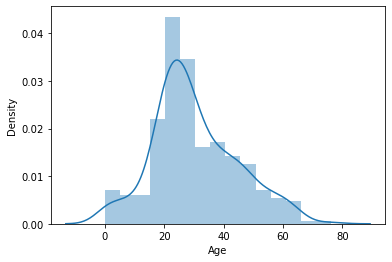

In [19]:
sns.distplot(data_test["Age"], kde=True)

In [20]:
#FIlling the Age column with the median and converting it into int dataset cos Age can not be a float number
data_train["Age"].fillna(data_train["Age"].median(),inplace=True)
data_train["Age"]=data_train["Age"].astype("int")

In [21]:
data_test["Age"].fillna(data_test["Age"].median(),inplace=True)
data_test["Age"]=data_test["Age"].astype("int")

In [22]:
data_train["Fare"].fillna(data_train["Fare"].mode()[0], inplace=True)

In [23]:
data_test["Fare"].fillna(data_test["Fare"].mode()[0], inplace=True)

In [24]:
data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
data_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [26]:
#Checking for duplicates
data_train.duplicated().sum()

0

In [27]:
data_test.duplicated().sum()

0

In [28]:
data_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034322,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064909,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339999,0.083081,0.018443,-0.549500
Age,0.034322,-0.064909,-0.339999,1.000000,-0.233066,-0.172745,0.096838
SibSp,-0.057527,-0.035322,0.083081,-0.233066,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172745,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096838,0.159651,0.216225,1.000000


In [29]:
data_test.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.031165,0.003818,0.043080,0.008767
Pclass,-0.026751,1.000000,-0.468160,0.001087,0.018721,-0.577491
Age,-0.031165,-0.468160,1.000000,-0.071548,-0.044016,0.341496
SibSp,0.003818,0.001087,-0.071548,1.000000,0.306895,0.172034
Parch,0.043080,0.018721,-0.044016,0.306895,1.000000,0.230411
Fare,0.008767,-0.577491,0.341496,0.172034,0.230411,1.000000


<AxesSubplot:xlabel='Survived', ylabel='count'>

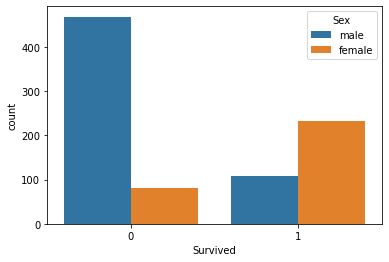

In [30]:
sns.countplot("Survived", hue="Sex", data=data_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

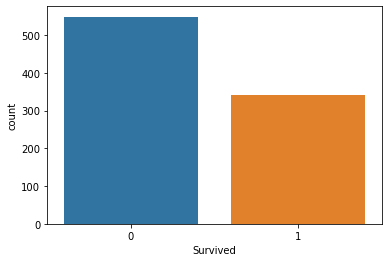

In [31]:
sns.countplot("Survived", data=data_train)

The amount of people that died is more than those that survived 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

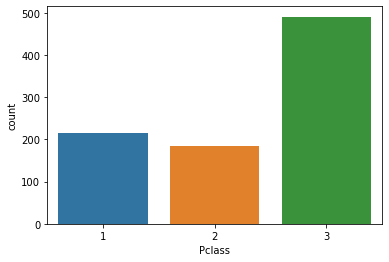

In [32]:
sns.countplot("Pclass", data=data_train)

In [33]:
#Label Encoding the categoricl variables
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
data_train["Sex"]= LE.fit_transform(data_train["Sex"])
data_test["Sex"]=LE.fit_transform(data_test["Sex"])
data_train["Embarked"]= LE.fit_transform(data_train["Embarked"])
data_test["Embarked"]=LE.fit_transform(data_test["Embarked"])

In [34]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,2


In [35]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22,1,1,3101298,12.2875,2


In [36]:
X=data_train.drop(["PassengerId", "Name", "Ticket", "Survived"], axis=1)
y=data_train["Survived"]

In [37]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7.2500,2
1,1,0,38,1,0,71.2833,0
2,3,0,26,0,0,7.9250,2
3,1,0,35,1,0,53.1000,2
4,3,1,35,0,0,8.0500,2


In [38]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Splitting the data into Training set and Test set

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=2)

## Training the Logistic Regression on the training set

In [40]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [41]:
y_train.unique()

array([0, 1], dtype=int64)

In [42]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,1,40,0,0,27.7208,0
10,3,0,4,1,1,16.7000,2
873,3,1,47,0,0,9.0000,2
182,3,1,9,4,2,31.3875,2
876,3,1,20,0,0,9.8458,2
...,...,...,...,...,...,...,...
534,3,0,30,0,0,8.6625,2
584,3,1,28,0,0,8.7125,0
493,1,1,71,0,0,49.5042,0
527,1,1,28,0,0,221.7792,2


## Predicting the Test set Result

In [43]:
y_pred=LR.predict(X_test)

## Checking the performance of the model

In [44]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[91,  9],
       [28, 51]], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7932960893854749

In [46]:
y_test.shape

(179,)

## Training on Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
Y_pred=RF.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,Y_pred)
cm

array([[85, 15],
       [19, 60]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, Y_pred)

0.8100558659217877

## Training on Descision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred2=DT.predict(X_test)

In [53]:
y_pred2

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred2)
cm

array([[84, 16],
       [21, 58]], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.7932960893854749

### Predicting using the test dataset

In [56]:
x_test=data_test.drop(["PassengerId", "Name", "Ticket"], axis=1)

In [57]:
y_pred=LR.predict(x_test)

In [58]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,